# MNIST for mobile devs

This notebook is just the longer, more detailed version of [Get Started with TensorFlow](https://www.tensorflow.org/tutorials/) ([Colab notebook](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb#scrollTo=T4JfEh7kvx6m)). The intention here is to show the way of thinking that can be useful for you, as a consumer of TensorFlow model. It shows where some numbers come from, so you know how to plug in your first model to Android or any other platform supporting TensorFlow lite.

**Hey, mobile engineer**, look for -> (⚠️📲👀). It can be useful information for you while implementing MNIST model in mobile app.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version {}".format(tf.__version__))

TensorFlow version 1.12.0


Load MNIST dataset:

In [2]:
mnist = tf.keras.datasets.mnist
(images_train, labels_train),(images_test, labels_test) = mnist.load_data()
class_names = ["zero","one","two","three","four","five","six","seven","eight","nine"]

## What is our training data?

### Training images

In [3]:
print("Data type:", type(images_train))
print("Dataset shape:", (images_train.shape))

Data type: <class 'numpy.ndarray'>
Dataset shape: (60000, 28, 28)


It means that we get array of 60000 images for training, 28x28 pixels each.

### Labels

In [4]:
print("Labels:", len(labels_train))
print("Possible values:", np.unique(labels_train))

Labels: 60000
Possible values: [0 1 2 3 4 5 6 7 8 9]


### Example image

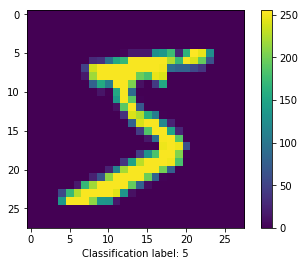

In [5]:
plt.figure()
plt.imshow(images_train[0])
plt.colorbar()
plt.grid(False)
plt.xlabel("Classification label: {}".format(labels_train[0]))
plt.show()

Each cell (pixel) can have value from 0 to 255 like it's presented above. 

Let's scale it to float value between 0 and 1:

In [6]:
images_train = images_train / 255.0
images_test = images_test / 255.0

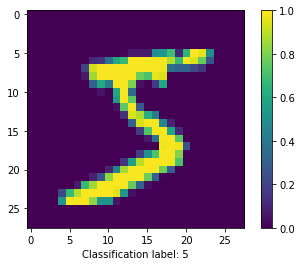

In [7]:
plt.figure()
plt.imshow(images_train[0])
plt.colorbar()
plt.grid(False)
plt.xlabel("Classification label: {}".format(labels_train[0]))
plt.show()

---
(⚠️📲👀)

It is worth mentioning that input images are inverted (white number on black background). MNIST data is prepared in a way where the smaller pixel's value is, the whiter it is (0 means 100% white, 255 means 100% black). 

It's important because when you plug in model to an Android app, you will need to prepare input image in the same way (scale down and inverse colors).

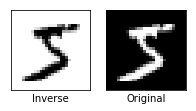

In [8]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 6, 1)
plt.xticks([])
plt.yticks([])
plt.xlabel("Inverse")
plt.imshow(images_train[0], cmap=plt.cm.binary)

plt.subplot(3, 6, 2)
plt.xticks([])
plt.yticks([])
plt.xlabel("Original")
plt.imshow(images_train[0], cmap=plt.cm.gray)

## Model training

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(images_train, labels_train, epochs=16)

Epoch 1/16
60000/60000 [==============================] - 18s 295us/step - loss: 0.2146 - acc: 0.9361
Epoch 2/16
60000/60000 [==============================] - 18s 299us/step - loss: 0.1063 - acc: 0.9677
Epoch 3/16
60000/60000 [==============================] - 18s 298us/step - loss: 0.0809 - acc: 0.9748
Epoch 4/16
60000/60000 [==============================] - 18s 295us/step - loss: 0.0672 - acc: 0.9791
Epoch 5/16
60000/60000 [==============================] - 20s 326us/step - loss: 0.0589 - acc: 0.9811
Epoch 6/16
60000/60000 [==============================] - 21s 343us/step - loss: 0.0530 - acc: 0.9834
Epoch 7/16
60000/60000 [==============================] - 20s 329us/step - loss: 0.0481 - acc: 0.9851
Epoch 8/16
60000/60000 [==============================] - 19s 316us/step - loss: 0.0432 - acc: 0.9863
Epoch 9/16
60000/60000 [==============================] - 17s 279us/step - loss: 0.0402 - acc: 0.9872
Epoch 10/16
60000/60000 [==============================] - 19s 324us/step - loss: 

In [11]:
test_loss, test_acc = model.evaluate(images_test, labels_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 61us/step
Test accuracy: 0.9842


## Model evaluation 

Let's take one image from the test set:

In [12]:
example_img = images_test[0]

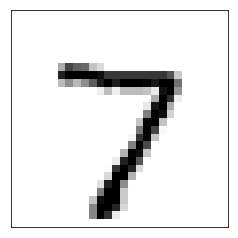

In [13]:
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(example_img, cmap=plt.cm.binary)

What does our prediction say?

In [14]:
example_img_as_input = (np.expand_dims(example_img,0))
print("Image data shape:", example_img_as_input.shape)

img_prediction = model.predict(example_img_as_input)
print("Prediction results:", img_prediction)
print("Predicted value:", np.argmax(img_prediction))

Image data shape: (1, 28, 28)
Prediction results: [[1.4690932e-19 9.6753541e-13 6.5179342e-15 5.8694096e-12 3.5496546e-21
  9.8531299e-21 2.1520656e-26 1.0000000e+00 4.4833306e-15 7.8319122e-11]]
Predicted value: 7


Visualise more predictions. Plot the first X test images, their predicted label, and the true label. Color correct predictions in blue, incorrect predictions in red.

In [15]:
# Helper functions

import matplotlib.pyplot as plt
import numpy as np


def plot_image(i, predictions_array, true_label, img, class_names):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


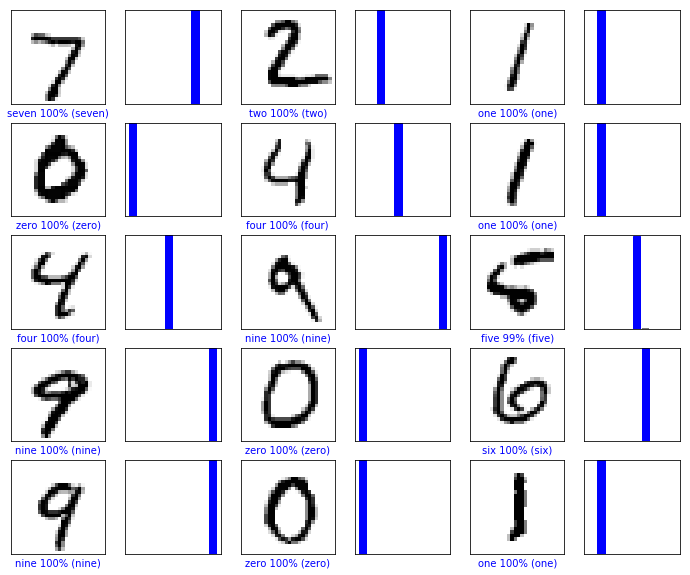

In [16]:
predictions = model.predict(images_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2  *2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, labels_test, images_test, class_names)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, labels_test)

## Save and export model

In [17]:
!pip install -q h5py pyyaml

In [18]:
model.summary()
loss, acc = model.evaluate(images_test, labels_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
print("Restored model, loss: {}".format(loss))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
1000

In [19]:
keras_mnist_model = 'mnist_model.h5'

In [20]:
model.save(keras_mnist_model)

### Load saved model
Just to make sure that it looks the same as the one that we created.

In [21]:
new_model = keras.models.load_model(keras_mnist_model)
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [22]:
loss, acc = new_model.evaluate(images_test, labels_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
print("Restored model, loss: {}".format(loss))

10000/10000 [==============================] - 1s 87us/step
Restored model, accuracy: 98.42%
Restored model, loss: 0.08279526897818869


## Convert model to TensorFlow Lite

In [23]:
tflite_mnist_model = "mnist_model.tflite"

converter = tf.contrib.lite.TFLiteConverter.from_keras_model_file(keras_mnist_model)
tflite_model = converter.convert()
open(tflite_mnist_model, "wb").write(tflite_model)

INFO:tensorflow:Froze 6 variables.
INFO:tensorflow:Converted 6 variables to const ops.


2680200

(⚠️📲👀)

Now learn more about out TensorFlow Lite model. You need to know those information when you will implement model in client app (Android, iOS, anything else using TensorFlow Lite).

In [24]:
interpreter = tf.contrib.lite.Interpreter(model_path=tflite_mnist_model)
interpreter.allocate_tensors()

print("== Input details ==")
print("name:", interpreter.get_input_details()[0]['name'])
print("shape:", interpreter.get_input_details()[0]['shape'])
print("type:", interpreter.get_input_details()[0]['dtype'])

print("\n== Output details ==")
print("name:", interpreter.get_output_details()[0]['name'])
print("shape:", interpreter.get_output_details()[0]['shape'])
print("type:", interpreter.get_output_details()[0]['dtype'])

print("\nDUMP INPUT")
print(interpreter.get_input_details()[0])
print("\nDUMP OUTPUT")
print(interpreter.get_output_details()[0])

== Input details ==
name: flatten_input
shape: [ 1 28 28]
type: <class 'numpy.float32'>

== Output details ==
name: dense_2/Softmax
shape: [ 1 10]
type: <class 'numpy.float32'>

DUMP INPUT
{'index': 10, 'name': 'flatten_input', 'quantization': (0.0, 0), 'shape': array([ 1, 28, 28], dtype=int32), 'dtype': <class 'numpy.float32'>}

DUMP OUTPUT
{'index': 8, 'name': 'dense_2/Softmax', 'quantization': (0.0, 0), 'shape': array([ 1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>}


From input details we learn that input shape is [1 28 28] and its type - Float32. On mobile app we'll need to create byte array of size: 3136 bytes (28 x 28 x 4). 4 is size of Float32 value.

## TensorFlow Lite model evaluation
Let's make sure our TF Lite model is still working after the conversion. 

Pick random image:

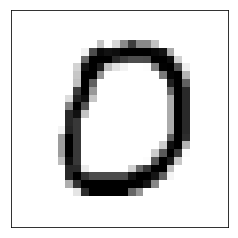

In [25]:
example_img_for_tflite = images_test[10]

plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(example_img_for_tflite, cmap=plt.cm.binary)

Make sure that input data is matching to model's input and make a prediction! 🙂

In [26]:
example_img_for_tflite = np.expand_dims(example_img_for_tflite,0).astype(np.float32)
print("Input data shape:", example_img_for_tflite.shape)
print("Input data type:", example_img_for_tflite.dtype)

input_details = interpreter.get_input_details()
interpreter.set_tensor(input_details[0]['index'], example_img_for_tflite)

interpreter.invoke()

output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("\n\nPrediction results:", output_data)
print("Predicted value:", np.argmax(output_data))

Input data shape: (1, 28, 28)
Input data type: float32


Prediction results: [[1.0000000e+00 0.0000000e+00 1.0811283e-33 3.5635020e-42 2.4210794e-40
  2.5139294e-42 1.5545197e-36 1.9095801e-33 1.7956449e-39 9.2877016e-30]]
Predicted value: 0


Classify image from the outside. Something similar what app will do.

Prediction results: [[1.0000000e+00 1.1132402e-34 8.5123743e-31 1.2891844e-29 2.4374999e-36
  1.0177892e-20 4.8579324e-21 6.1996755e-23 5.8513043e-26 4.8028417e-27]]
Predicted value: 0


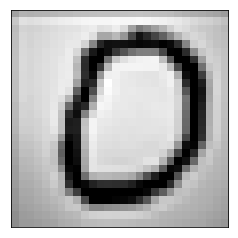

In [27]:
from PIL import Image
import PIL.ImageOps    

img = Image.open("test.png").convert('L')
img.load()
img = PIL.ImageOps.invert(img)
data = np.asarray( img, dtype="int32" )

plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(data, cmap=plt.cm.binary)

data = data / 255.0
inputImg = np.expand_dims(data,0).astype(np.float32)
inputImg.shape

input_details = interpreter.get_input_details()
interpreter.set_tensor(input_details[0]['index'], inputImg)

interpreter.invoke()

output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results:", output_data)
print("Predicted value:", np.argmax(output_data))